In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
DT_raw=pd.read_csv('loan.csv',index_col=0)
DT_raw.shape

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(887379, 73)

In [3]:
print(DT_raw['loan_status'].unique())
print(DT_raw[DT_raw['loan_status']=='Does not meet the credit policy. Status:Charged Off'].shape)
print(DT_raw[DT_raw['loan_status']=='Does not meet the credit policy. Status:Fully Paid'].shape)
(761+1988)/DT_raw.shape[0]

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off' 'Issued']
(761, 73)
(1988, 73)


0.0030978871485577188

### Evaluation 1: Differentiate between Fully Paid & Charged Off Loans ( Ex Post Facto Analysis)
- Determine if **data collected before loan approval** can be used to accurately predict 
- Loans that are not recorded as either 'Fully Paid' or 'Charged Off' are omitted

#### Predictors of Interest
Quantitative data
Qualitative data with fixed number of levels

In [11]:
eval1_covars = ['addr_state','annual_inc','annual_inc_joint',
                'dti','dti_joint','emp_length','fico_range_low',
                'fico_range_high','funded_amnt','funded_amnt_inv',
               'home_ownership','installment','int_rate',
               'last_fico_range_low','last_fico_range_high','inq_fi','loan_status']

In [12]:
include_indx=(DT_raw['loan_status']=='Fully Paid') | (DT_raw['loan_status']=='Charged Off')
DT_eval1 = DT_raw.loc[include_indx, eval1_covars]
DT_eval1.shape

(252971, 17)

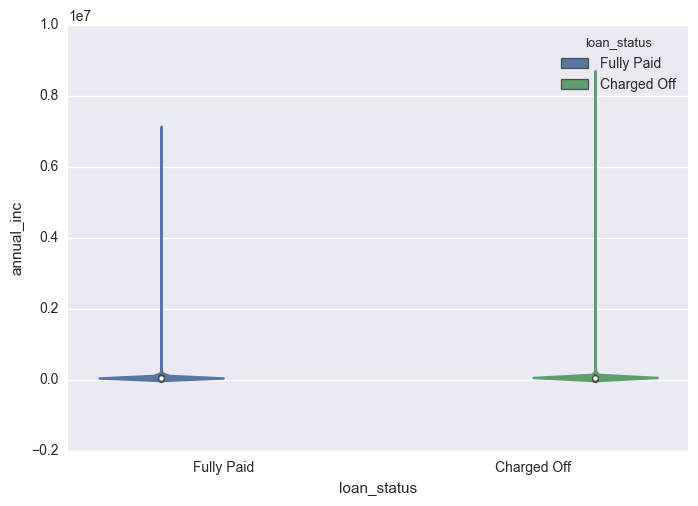

In [13]:
sns.violinplot(data = DT_eval1,x='loan_status',y='annual_inc',hue = 'loan_status')
